In [37]:
# link for the image files  
# https://drive.google.com/file/d/11QjvcrJbuaeT9DeV4pdJZNZIu4wtX2Db/view?usp=sharing

In [16]:
# loading VGG model 

import torch
from torchvision import models
from PIL import Image

from torchvision import transforms as T

import numpy as np
import matplotlib.pyplot as plt

vgg = models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [17]:
# we donot need the classfier part , we just need the features
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [18]:
for param in vgg.parameters():
  param.requires_grad_(False)

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [20]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [21]:
def preprocess(img_path,max_size = 500):
  image = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size

  else:
    size = max(image.size)

  img_transforms = T.Compose([
                    T.Resize(size),
                    T.ToTensor(),
                    T.Normalize(mean=[0.485, 0.456, 0.486],
                                std = [0.229, 0.224, 0.225])
                    
  ])
  image = img_transforms(image)

  image = image.unsqueeze(0) #(3,224,224) >> (1,3,224,244)

  return image


In [22]:
style_p = preprocess('/content/sample_data/files/style10.jpg')
content_p = preprocess('/content/sample_data/files/harrypotter.jpg')


content_p = content_p.to(device)
style_p = style_p.to(device)

print('Content_ Shape', content_p.shape)
print('Style Shape', style_p.shape)

Content_ Shape torch.Size([1, 3, 423, 270])
Style Shape torch.Size([1, 3, 500, 765])


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0) #(1,3,224,224) >> (3,224,244)
  image = image.transpose(1,2,0) # (3,224,244) >> (224,224,3)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.486])

  image = image.clip(0,1)

  return image

In [24]:
content_d = deprocess(content_p)

style_d = deprocess(style_p)

print('Deprocess content shape', content_d.shape)
print('Deprocess style Shape', style_d.shape)

Deprocess content shape (423, 270, 3)
Deprocess style Shape (500, 765, 3)


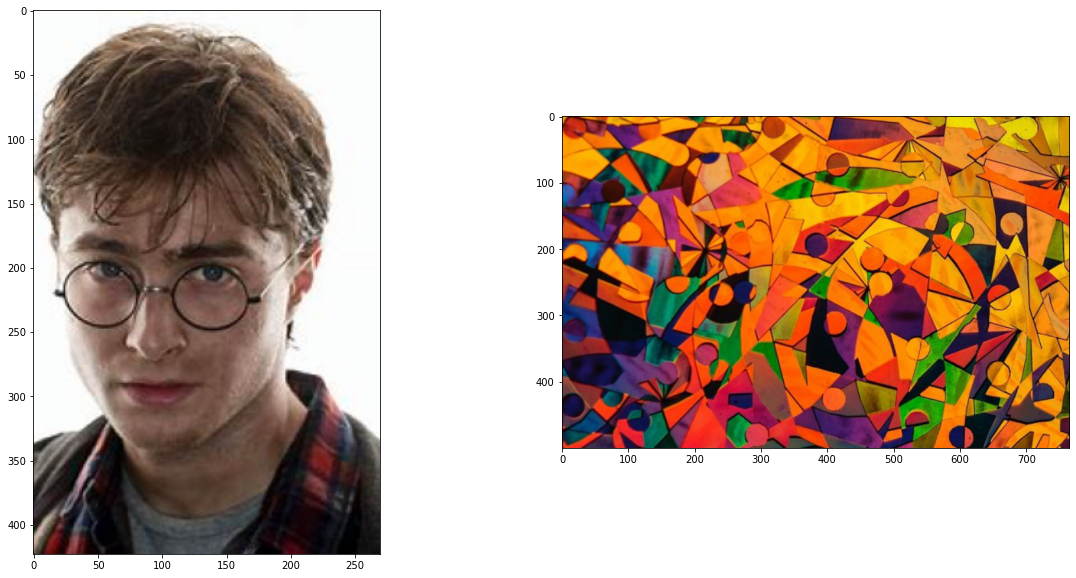

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

In [26]:
def get_features(image,model):
  layers = {
      '0': 'conv1_1',
      '5': 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2', #content_feature
      '28': 'conv5_1'
  }

  x = image
  Features = {}
  for name, layer in model._modules.items():
    x = layer(x)

    if  name in layers:
      Features[layers[name]] = x

  return Features

In [27]:
content_f = get_features(content_p,vgg)
style_f = get_features(style_p, vgg)

In [28]:
def gram_matrix(tensor):

  b,c,h,w = tensor.size()
  tensor = tensor.view(c,h*w)
  gram = torch.mm(tensor,tensor.t())
  return gram
  

In [29]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}


In [30]:
def content_loss(target_conv4_2,content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [31]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}

In [32]:
def style_loss(style_weights,target_features,style_grams):

  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b,c,h,w = target_f.shape
    layer_loss = style_weights[layer] *torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)
  return loss
  


In [33]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target,vgg)
print('Content loss : ', content_loss(target_f['conv4_2'],content_f['conv4_2']))
print('Style Loss: ',style_loss(style_weights, target_f, style_grams))

Content loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss:  tensor(9412.4580, device='cuda:0', grad_fn=<AddBackward0>)


In [34]:
#Training loop
from torch import optim

optimizer =optim.Adam([target],lr=0.003)
alpha =1
beta = 0.00005
epochs = 3000
show_every = 500


In [35]:
def total_loss(c_loss,s_loss,alpha,beta):
  loss = alpha*c_loss  + beta*s_loss
  return loss
  

In [36]:
result = []

for i in range(epochs):

  target_f = get_features(target,vgg)

  c_loss = content_loss(target_f['conv4_2'],content_f['conv4_2'])
  s_loss = style_loss(style_weights,target_f,style_grams)
  t_loss = total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()
  
  if i % show_every == 0:
    print("Total loss at Epoch {} : {}".format(i,t_loss))
    result.append(deprocess(target.detach()))

Total loss at Epoch 0 : 0.4706228971481323
Total loss at Epoch 500 : 0.38579970598220825
Total loss at Epoch 1000 : 0.2818533778190613
Total loss at Epoch 1500 : 0.2446717768907547
Total loss at Epoch 2000 : 0.22112669050693512
Total loss at Epoch 2500 : 0.20239654183387756


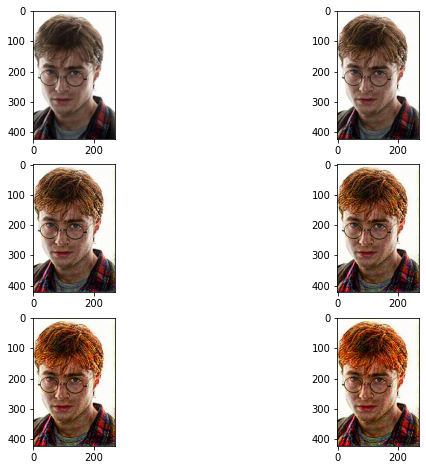

In [38]:
plt.figure(figsize = (10,8))

for i in range (len(result)):

  plt.subplot(3,2,i+1)
  plt.imshow(result[i])
plt.show()

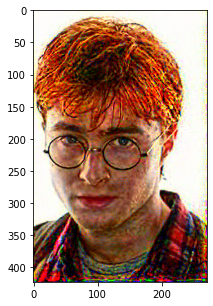

In [41]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig,(ax1) = plt.subplots(1,1,figsize = (10,5))
ax1.imshow(target_copy)
# ax2.imshow(content_copy)